#  Classification Project


### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2



In [3]:
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:

file_path = '/content/drive/My Drive/cancer_classification.csv'

# 使用 pandas 读取 csv 文件
data = pd.read_csv(file_path)

# 显示前几行数据，确认文件已正确加载
print(data.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [13]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

## EDA

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
class_counts = data['benign_0__mal_1'].value_counts()
print(class_counts)

1    357
0    212
Name: benign_0__mal_1, dtype: int64


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

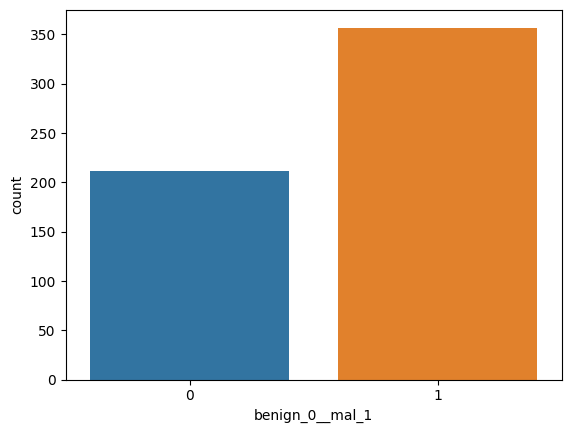

In [16]:
sns.countplot(x='benign_0__mal_1',data=data)

In [19]:
# 计算相关性
corr_matrix = data.corr()


<Axes: >

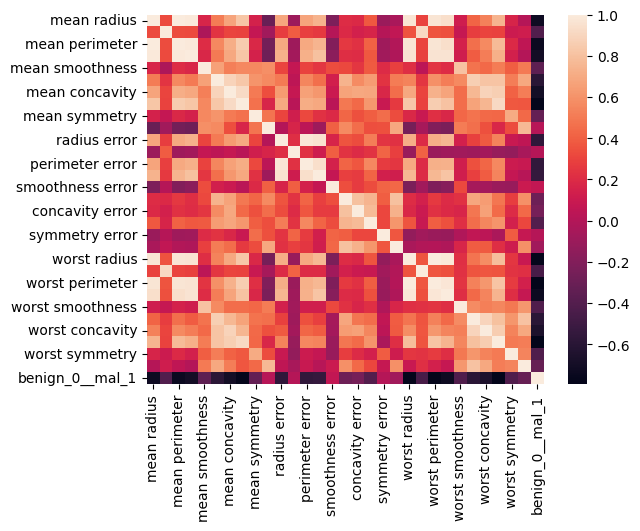

In [20]:
sns.heatmap(data.corr())

<Axes: >

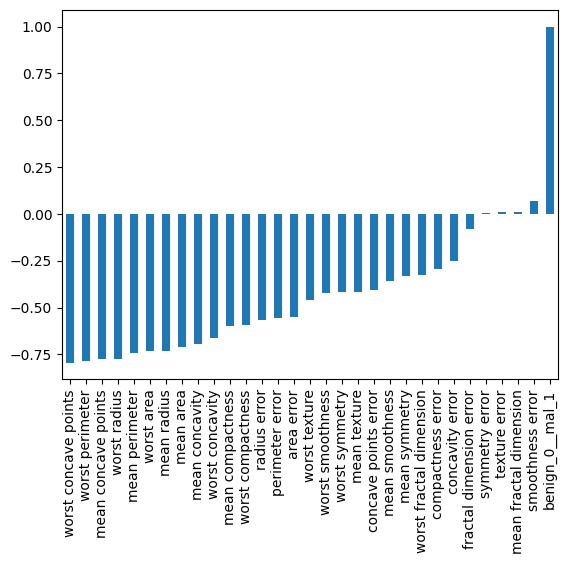

In [22]:
data.corr()['benign_0__mal_1'].sort_values().plot(kind='bar') ##没有排除与自身相关的变量

<Axes: >

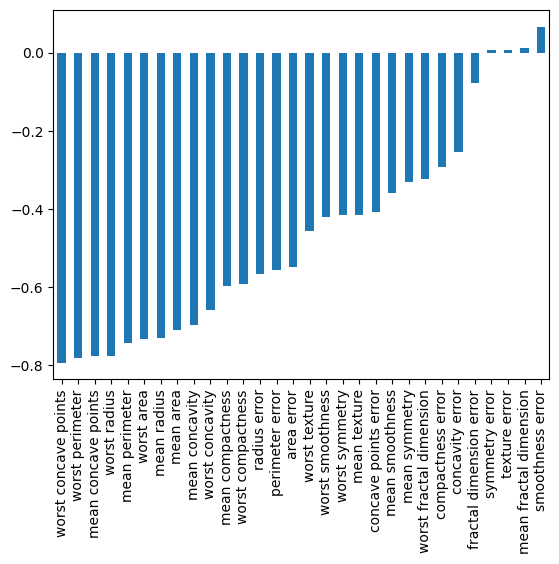

In [23]:
data.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar') #排除自相关

## Train Test Split

In [24]:
X = data.drop('benign_0__mal_1',axis=1).values
y = data['benign_0__mal_1'].values

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)

MinMaxScaler()

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [32]:
X_train.shape

(426, 30)

In [33]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model

### Example One: Choosing too many epochs and overfitting!

In [35]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0233 - val_loss: 0.1377
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0224 - val_loss: 0.1372
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0248 - val_loss: 0.1478
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0234 - val_loss: 0.1342
Epoch 5/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0261 - val_loss: 0.1377
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0257 - val_loss: 0.1461
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0276 - val_loss: 0.1323
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0290 - val_loss: 0.1575
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0242 - val_loss: 0.1380
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0222 - val_loss: 0.1347
Epoch 1

In [38]:
# model.history.history

In [39]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
# model_loss

<Axes: >

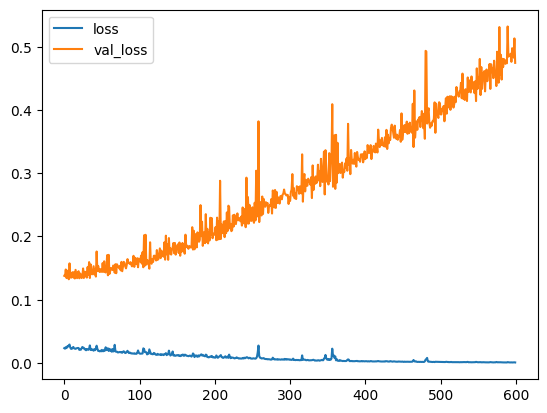

In [40]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [41]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [42]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [44]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 28ms/step - loss: 0.6760 - val_loss: 0.6523
Epoch 2/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6406 - val_loss: 0.6212
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6068 - val_loss: 0.5828
Epoch 4/600
14/14 [==============================] - 0s 15ms/step - loss: 0.5595 - val_loss: 0.5211
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4939 - val_loss: 0.4552
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.4332 - val_loss: 0.3958
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3850 - val_loss: 0.3477
Epoch 8/600
14/14 [==============================] - 0s 11ms/step - loss: 0.3375 - val_loss: 0.3053
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.2999 - val_loss: 0.2716
Epoch 10/600
14/14 [==============================] - 0s 18ms/step - loss: 0.2713 - val_loss: 0.2471
E

<Axes: >

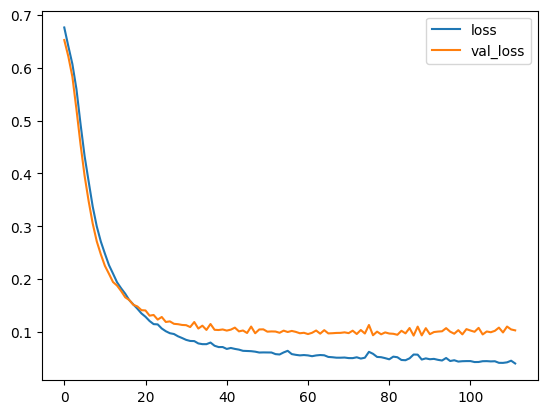

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [46]:
from tensorflow.keras.layers import Dropout

In [47]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [48]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 13ms/step - loss: 0.7345 - val_loss: 0.6967
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6835 - val_loss: 0.6699
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6678 - val_loss: 0.6381
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6367 - val_loss: 0.6004
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6215 - val_loss: 0.5705
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5754 - val_loss: 0.5367
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5677 - val_loss: 0.5063
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5563 - val_loss: 0.4780
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5177 - val_loss: 0.4490
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4888 - val_loss: 0.4188
Epoch 11

<Axes: >

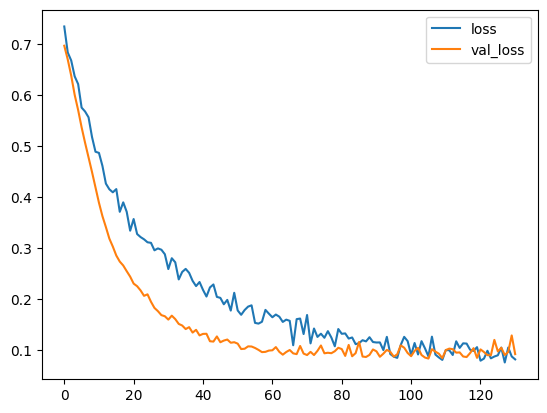

In [49]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:


predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype("int32")


5/5 [==============================] - 0s 3ms/step


In [59]:
from sklearn.metrics import classification_report

# 确保 predicted_classes 已经根据概率转换为0或1
print(classification_report(y_test, predicted_classes))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

